<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Exam" data-toc-modified-id="Final-Exam-1">Final Exam</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Chapter-15,-&quot;Milk&quot;-Solution" data-toc-modified-id="Exercise:-Chapter-15,-&quot;Milk&quot;-Solution-1.1">Exercise: Chapter 15, "Milk" Solution</a></span><ul class="toc-item"><li><span><a href="#--Part-1:--" data-toc-modified-id="--Part-1:---1.1.1"><b> <font color="blue"> Part 1: </font> </b></a></span></li><li><span><a href="#--Part-2:--" data-toc-modified-id="--Part-2:---1.1.2"><b> <font color="blue"> Part 2: </font> </b></a></span></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-1.1.3">Conclusion:</a></span></li></ul></li><li><span><a href="#Exercise:-Chapter-16,-&quot;Apply-root_bisect-to-Milk&quot;-Solution" data-toc-modified-id="Exercise:-Chapter-16,-&quot;Apply-root_bisect-to-Milk&quot;-Solution-1.2">Exercise: Chapter 16, "Apply root_bisect to Milk" Solution</a></span><ul class="toc-item"><li><span><a href="#Description:--" data-toc-modified-id="Description:---1.2.1"><b><font color="blue">Description: </font> </b></a></span></li><li><span><a href="#Approach:--" data-toc-modified-id="Approach:---1.2.2"><b><font color="blue">Approach: </font> </b></a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2.3">Conclusion</a></span></li></ul></li></ul></li></ul></div>

# Final Exam
<I> Directions: </I> For the DATA 604 final exam select any two exercises in chapters 13 thru 26 and solve them. <br>
<I> Exercises: </I>  I selected the "Coffee and Milk" exercise in Chapter 15 and the root_bisect exercise in Chapter 16.

## Exercise: Chapter 15, "Milk" Solution

<font color = 'blue'>**Setup:** </font>

In [1]:
import pandas as pd 
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### <B> <font color ='blue'> Part 1: </font> </B> 
Simulate the temperature of 50 mL of milk with a starting temperature of 5 degC, in a vessel with the same insulation, for 15 minutes, and plot the results.

In [2]:
#Define the functions...
def update_func(state, t, system):
    """Update the thermal transfer model using Newtons law of cooling.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    r, T_env, dt = system.r, system.T_env, system.dt
    
    T = state.T
    T += -r * (T - T_env) * dt
    
    return State(T=T)

In [3]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [4]:
def make_system(T_init, r, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
                   
    return System(init=init,
                  r=r, 
                  volume=volume,
                  temp=T_init,
                  t_0=0, 
                  t_end=t_end, 
                  dt=1,
                  T_env=22)

In [5]:
#Run the functions
milk = make_system(T_init=5, r=0.01, volume=50, t_end=15)
results = run_simulation(milk, update_func)
T_final = round(get_last_value(results.T),1)

7.4

The milk warms up from a starting temperature of 5 degrees celcius to 7.4 degrees celcius as shown in the plot below...


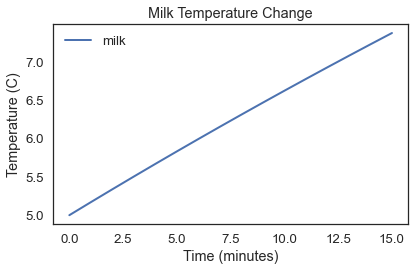

In [6]:
#Plot the results...
print(f'The milk warms up from a starting temperature of', milk.init[0], 'degrees celcius to', T_final,
      'degrees celcius as shown in the plot below...')

plot(results.T, label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)',
         title='Milk Temperature Change')

### <B> <font color='blue'> Part 2: </font> </B> 
By trial and error, find a value for `r` that makes the final temperature close to 20 C.

In [7]:
r_values = linrange(0.01,0.135,0.003)

T_final_df = pd.DataFrame(columns=['r', 'T_final'])

for r in r_values:
    milk = make_system(T_init=5, r=r, volume=50, t_end=15)
    results = run_simulation(milk, update_func)
    T_final = round(get_last_value(results.T),1)
    T_final_df = T_final_df.append({'r':r,'T_final':T_final}, ignore_index=True)

T_final_df.tail(2)

,r,T_final
40,0.130,19.9
41,0.133,20.0


### Conclusion:

In [8]:
rvalue_close_to_20 = round(T_final_df.iloc[-1][0],3)
temp_value = round(T_final_df.iloc[-1][1],2)

print(f'An r value of', rvalue_close_to_20, 'makes a final temperature of', temp_value)

An r value of 0.133 makes a final temperature of 20.0


## Exercise: Chapter 16, "Apply root_bisect to Milk" Solution

### <B><font color = 'blue'>Description: </font> </B>
Repeat this process (root_bisect process) to estimate `r_milk`, given that it starts at 5 C and reaches 20 C after 15 minutes. 

### <B><font color = 'blue'>Approach: </font> </B>
From the previous exercise in chapter 15, we know that 0.133 makes a temperature of 20.  So, for purposes of applying root_bisect it makes sense to try a range of values from 0.10 to 0.15. 

In [9]:
def error_func1(r, target_temp):
    """Runs a simulation and returns the `error`.
    
    r: heat transfer rate, in 1/min
    
    returns: difference between final temp and 70 C
    """
    milk = make_system(T_init=5, r=r, volume=50, t_end=15)
    results = run_simulation(milk, update_func)
    T_final = get_last_value(results.T)
    
    return T_final - target_temp

In [10]:
res = root_bisect(error_func1, [0.10, 0.15], 20)

,values
converged,True
root,0.132961


### Conclusion

The above results of root_bisect (res), return a converged value of "True", so a root was successfully found.  The r value (root) found was 0.133, which is the same r value as the previously applied trial and error approach provided.  